In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class FuzzyController:
    #todo
    # write all the fuzzify,inference,defuzzify method in this class
    def __init__(self):
        pass

    def decide(self, left_dist,right_dist,inference_type="Denis",deffuzify_type = "integral",):
        fuzz = self.fuzzify(left_dist,right_dist)
        if inference_type == "Minimum":
            infer = self.inference(fuzz,inference_type=inference_type)
            rot = self.defuzzify(infer,defuzzify_type=deffuzify_type,t_norm_type="min",infer_type="Minimum")
        elif inference_type == "Mamdani":
            infer = self.inference(fuzz,inference_type=inference_type)
            rot = self.defuzzify(infer,defuzzify_type=deffuzify_type,t_norm_type="product")
        elif inference_type == "Luka":
            infer = self.inference(fuzz,inference_type=inference_type)
            rot = self.defuzzify(infer,defuzzify_type=deffuzify_type,infer_type="Luka")
        elif inference_type == "Zadeh":
            infer = self.inference(fuzz,inference_type=inference_type)
            rot = self.defuzzify(infer,defuzzify_type=deffuzify_type,infer_type="Zadeh")
        elif inference_type == "Denis":
            infer = self.inference(fuzz,inference_type=inference_type)
            rot = self.defuzzify(infer,defuzzify_type=deffuzify_type,infer_type="Denis")
        else:
            pass
        return rot
    
    def fuzzify(self,left_dist,right_dist):
        l = self.d_l(left_dist)
        r = self.d_r(right_dist)
        l.update(r)
        return l
    
    def inference(self , fuzz , inference_type = "Mamdani"):
        if inference_type == "Minimum" or inference_type == "Luka" or inference_type == "Zadeh" or inference_type == "Denis":
            lr = self.t_norm(fuzz['close_L'],fuzz['moderate_R'])
            hr = self.t_norm(fuzz['close_L'],fuzz['far_R'])
            ll = self.t_norm(fuzz['moderate_L'],fuzz['close_R'])
            hl = self.t_norm(fuzz['far_L'],fuzz['close_R'])
            no = self.t_norm(fuzz['moderate_L'],fuzz['moderate_R'])
            return {'lr' : lr ,
                    'hr' : hr ,
                    'll' : ll ,
                    'hl' : hl ,
                    'no' : no}
        if inference_type == "Mamdani":
            lr = self.t_norm(fuzz['close_L'],fuzz['moderate_R'],"product")
            hr = self.t_norm(fuzz['close_L'],fuzz['far_R'],"product")
            ll = self.t_norm(fuzz['moderate_L'],fuzz['close_R'],"product")
            hl = self.t_norm(fuzz['far_L'],fuzz['close_R'],"product")
            no = self.t_norm(fuzz['moderate_L'],fuzz['moderate_R'],"product")
            return {'lr' : lr ,
                    'hr' : hr ,
                    'll' : ll ,
                    'hl' : hl ,
                    'no' : no}
        


    def defuzzify(self,infer,defuzzify_type = "integral",t_norm_type = "min" , infer_type = "Minimum"):
        t = np.linspace(-50,50,10000)
        if defuzzify_type == "integral":
            num = 0.0
            denum = 0.0
            dt = t[1] - t[0]
            for i in t:
                out = self.output(i)
                if infer_type == "Minimum" or infer_type == "Mamdani":
                    u = max(self.t_norm(out['lr'],infer['lr'],t_norm_type),
                            self.t_norm(out['hr'],infer['hr'],t_norm_type),
                            self.t_norm(out['ll'],infer['ll'],t_norm_type),
                            self.t_norm(out['hl'],infer['hl'],t_norm_type),
                            self.t_norm(out['no'],infer['no'],t_norm_type))
                elif infer_type == "Luka":
                    u = min(min(1,1+out['lr']-infer['lr']),
                            min(1,1+out['hr']-infer['hr']),
                            min(1,1+out['ll']-infer['ll']),
                            min(1,1+out['hl']-infer['hl']),
                            min(1,1+out['no']-infer['no']))
                elif infer_type == "Zadeh":
                    u = min(max(min(out['lr'],infer['lr']),1-infer['lr']),
                            max(min(out['hr'],infer['hr']),1-infer['hr']),
                            max(min(out['ll'],infer['ll']),1-infer['ll']),
                            max(min(out['hl'],infer['hl']),1-infer['hl']),
                            max(min(out['no'],infer['no']),1-infer['no']))
                elif infer_type == "Denis":
                    u = min(max(1-infer['lr'],out['lr']),
                            max(1-infer['hr'],out['hr']),
                            max(1-infer['ll'],out['ll']),
                            max(1-infer['hl'],out['hl']),
                            max(1-infer['no'],out['no']))
                else:
                    raise ValueError(f"Unsupported inference type: {infer_type}")
                num += u*i*dt
                denum += u * dt
            return num/denum if denum != 0 else 0
        
        elif defuzzify_type == "average":
            max_lr = 0
            max_hr = 0
            max_ll = 0
            max_hl = 0
            max_no = 0
            for i in t:
                out = self.output(i)
                if max_lr < min(out['lr'],infer['lr']):
                    max_lr = min(out['lr'],infer['lr'])
                if max_hr < min(out['hr'],infer['hr']):
                    max_hr = min(out['hr'],infer['hr'])
                if max_ll < min(out['ll'],infer['ll']):
                    max_ll = min(out['ll'],infer['ll'])
                if max_hl < min(out['hl'],infer['hl']):
                    max_hl = min(out['hl'],infer['hl'])
                if max_no < min(out['no'],infer['no']):
                    max_no = min(out['no'],infer['no'])

            first_index_ll = 50
            last_index_ll = -50
            first_index_lr = 50
            last_index_lr = -50
            first_index_hl = 50
            last_index_hl = -50
            first_index_hr = 50
            last_index_hr = -50
            first_index_no = 50
            last_index_no = -50
            
            for i in t:
                out = self.output(i)
                if min(out['lr'],infer['lr']) == max_lr:
                    if first_index_lr > i:
                        first_index_lr = i
                    if last_index_lr < i:
                        last_index_lr = i
                if min(out['hr'],infer['hr']) == max_hr:
                    if first_index_hr > i:
                        first_index_hr = i
                    if last_index_hr < i:
                        last_index_hr = i
                if min(out['no'],infer['no']) == max_no:
                    if first_index_no > i:
                        first_index_no = i
                    if last_index_no < i:
                        last_index_no = i
                if min(out['ll'],infer['ll']) == max_ll:
                    if first_index_ll > i:
                        first_index_ll = i
                    if last_index_ll < i:
                        last_index_ll = i
                if min(out['hl'],infer['hl']) == max_hl:
                    if first_index_hl > i:
                        first_index_hl = i
                    if last_index_hl < i:
                        last_index_hl = i
            sum=(max_hl+max_hr+max_ll+max_lr+max_no)
            if sum == 0:
                return 0
            max_ll /= sum
            max_lr /= sum
            max_hl /= sum
            max_hr /= sum
            max_no /= sum

            return (first_index_hl+last_index_hl)*max_hl/2+(first_index_ll+last_index_ll)*max_ll/2+(first_index_hr+last_index_hr)*max_hr/2+(first_index_lr+last_index_lr)*max_lr/2 + (first_index_no+last_index_no)*max_no/2

        elif defuzzify_type == "mean_max":
            max_lr = 0
            max_hr = 0
            max_ll = 0
            max_hl = 0
            max_no = 0
            for i in t:
                out = self.output(i)
                if max_lr < min(out['lr'],infer['lr']):
                    max_lr = min(out['lr'],infer['lr'])
                if max_hr < min(out['hr'],infer['hr']):
                    max_hr = min(out['hr'],infer['hr'])
                if max_ll < min(out['ll'],infer['ll']):
                    max_ll = min(out['ll'],infer['ll'])
                if max_hl < min(out['hl'],infer['hl']):
                    max_hl = min(out['hl'],infer['hl'])
                if max_no < min(out['no'],infer['no']):
                    max_no = min(out['no'],infer['no'])            
            maximum = max(max_lr,max_ll,max_hl,max_hr,max_no)
            first_index = 50
            last_index = -50
            for i in t:
                out = self.output(i)
                if maximum == max_lr:
                    if min(out['lr'],infer['lr']) == maximum:
                        if first_index > i:
                            first_index = i
                        if last_index < i:
                            last_index = i
                            
                if maximum == max_hr:
                    if min(out['hr'],infer['hr']) == maximum:
                        if first_index > i:
                            first_index = i
                        if last_index < i:
                            last_index = i

                if maximum == max_no:
                    if min(out['no'],infer['no']) == maximum:
                        if first_index > i:
                            first_index = i
                        if last_index < i:
                            last_index = i

                if maximum == max_ll:
                    if min(out['ll'],infer['ll']) == maximum:
                        if first_index > i:
                            first_index = i
                        if last_index < i:
                            last_index = i

                if maximum == max_hl:
                    if min(out['hl'],infer['hl']) == maximum:
                        if first_index > i:
                            first_index = i
                        if last_index < i:
                            last_index = i

            return (last_index + first_index)/2

    class triangle:
        def __init__(self,first,mid,last):
            self.first = first
            self.mid = mid
            self.last = last

        
        def calc(self,input):
            if input < self.first:
                return 0
            elif input == self.mid:
                return 1
            elif input < self.mid:
                return (input - self.first)*(1/(self.mid-self.first))
            elif input < self.last:
                return (self.last - input)*(1/(self.last-self.mid))
            else:
                return 0
    
    def d_l(self,input):
        # for distance from left
        self.close_L = self.triangle(0,0,50)
        self.moderate_L = self.triangle(35,50,65)
        self.far_L = self.triangle(50,100,100)

        x = self.close_L.calc(input)
        y = self.moderate_L.calc(input)
        z = self.far_L.calc(input)

        return {"close_L" : x , "moderate_L" : y , "far_L" : z}
    
    def d_r(self,input):
        # for distance from right
        self.close_R = self.triangle(0,0,50)
        self.moderate_R = self.triangle(35,50,65)
        self.far_R = self.triangle(50,100,100)

        x = self.close_R.calc(input)
        y = self.moderate_R.calc(input)
        z = self.far_R.calc(input)

        return {"close_R" : x , "moderate_R" : y , "far_R" : z}
    
    def output(self,input):
        self.high_right = self.triangle(-50,-20,-5)
        self.low_right = self.triangle(-20,-10,0)
        self.nothing = self.triangle(-10,0,10)
        self.low_left = self.triangle(0,10,20)
        self.high_left = self.triangle(5,20,50)
        return {'hr':self.high_right.calc(input),
                'lr':self.low_right.calc(input),
                'no':self.nothing.calc(input),
                'll':self.low_left.calc(input),
                'hl':self.high_left.calc(input),
                }
    
    def t_norm(self,a, b, t_norm_type='min'):
        if t_norm_type == 'min':
            return min(a, b)
        elif t_norm_type == 'product':
            return a * b
        else:
            raise ValueError(f"Unsupported t-norm type: {t_norm_type}")
        
    def s_norm(self,a, b, s_norm_type='max'):
        if s_norm_type == 'max':
            return max(a, b)
        else:
            raise ValueError(f"Unsupported s-norm type: {s_norm_type}")
                

In [3]:
fuzz = FuzzyController()
fuzz.output(60)

{'hr': 0, 'lr': 0, 'no': 0, 'll': 0, 'hl': 0}

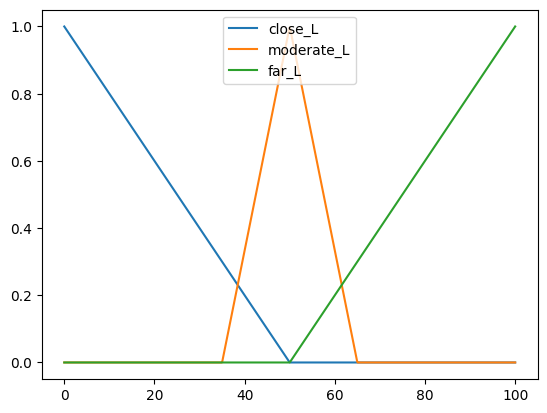

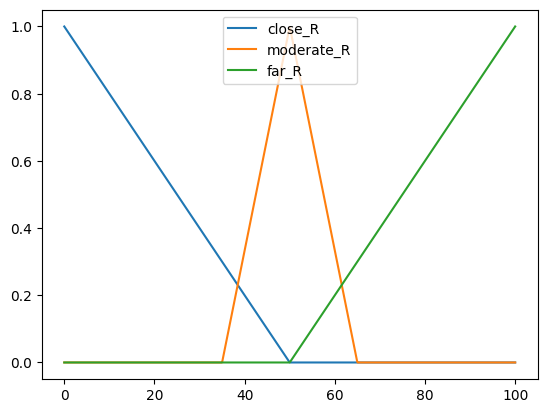

In [4]:
t = np.linspace(0,100,1000)
close_L = []
moderate_L = []
far_L = []
close_R = []
moderate_R = []
far_R = []
for i in t:
    u = fuzz.fuzzify(i,i)
    close_L.append(u['close_L'])
    close_R.append(u['close_R'])
    moderate_L.append(u['moderate_L'])
    moderate_R.append(u['moderate_R'])
    far_L.append(u['far_L'])
    far_R.append(u['far_R'])

plt.figure()
plt.plot(t,close_L)
plt.plot(t,moderate_L)
plt.plot(t,far_L)
plt.legend(['close_L','moderate_L','far_L'])
plt.figure()
plt.plot(t,close_R)
plt.plot(t,moderate_R)
plt.plot(t,far_R)
plt.legend(['close_R','moderate_R','far_R'])

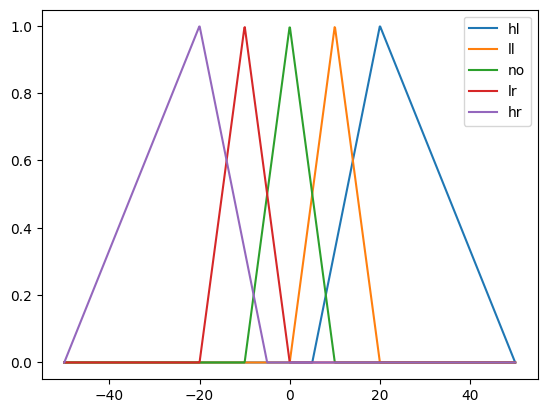

In [5]:
t = np.linspace(-50,50,1000)
ll = []
lr = []
hl = []
hr = []
no = []
for i in t:
    u = fuzz.output(i)
    ll.append(u['ll'])
    lr.append(u['lr'])
    hl.append(u['hl'])
    hr.append(u['hr'])
    no.append(u['no'])

plt.figure()
plt.plot(t,hl)
plt.plot(t,ll)
plt.plot(t,no)
plt.plot(t,lr)
plt.plot(t,hr)
plt.legend(['hl','ll','no','lr','hr'])

(0.0, 100.0)

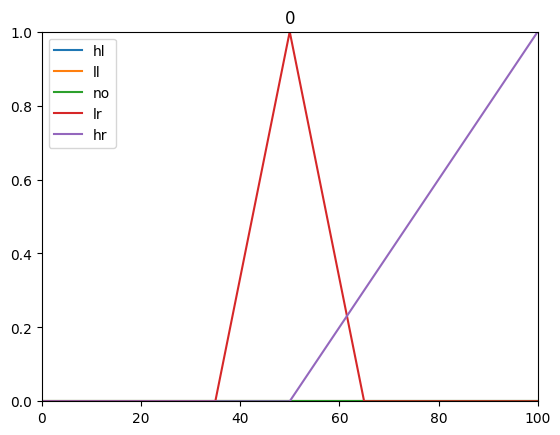

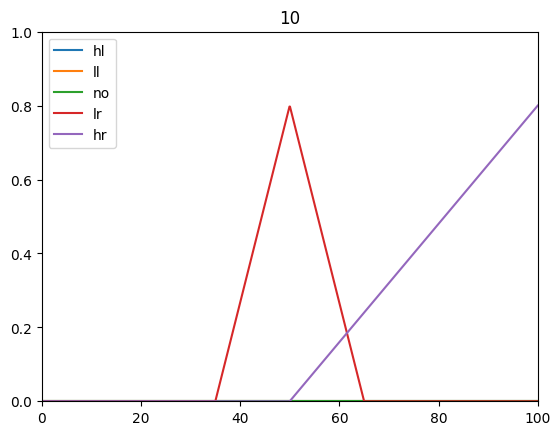

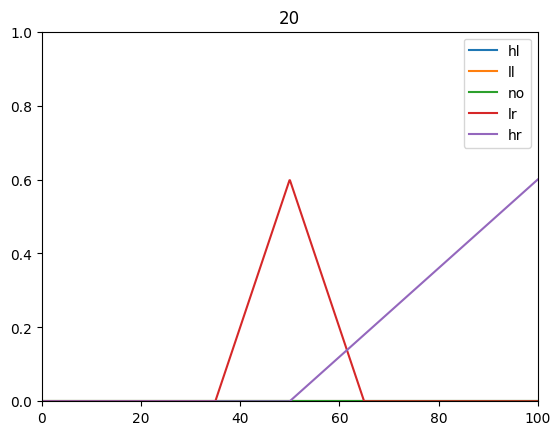

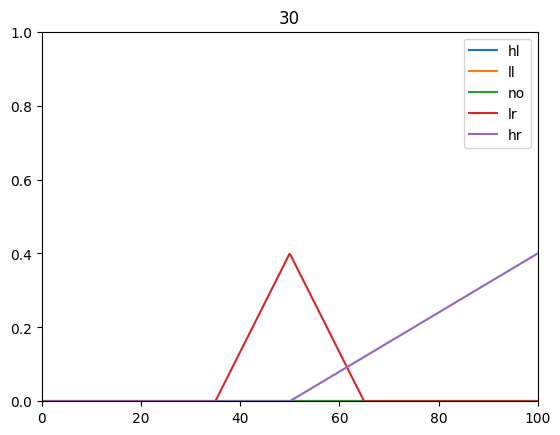

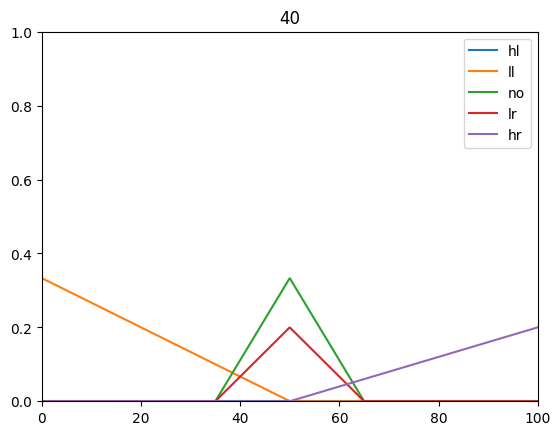

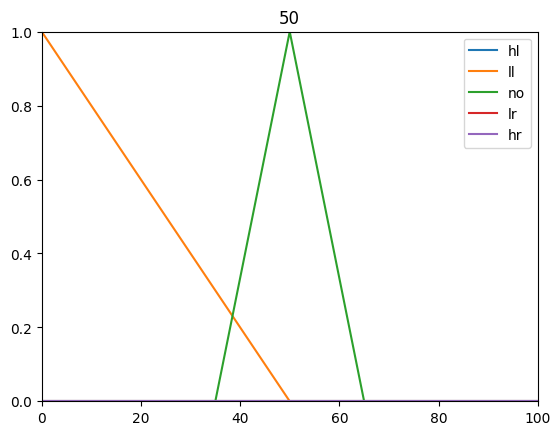

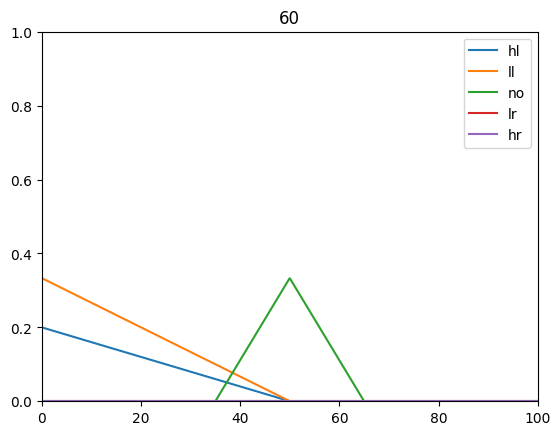

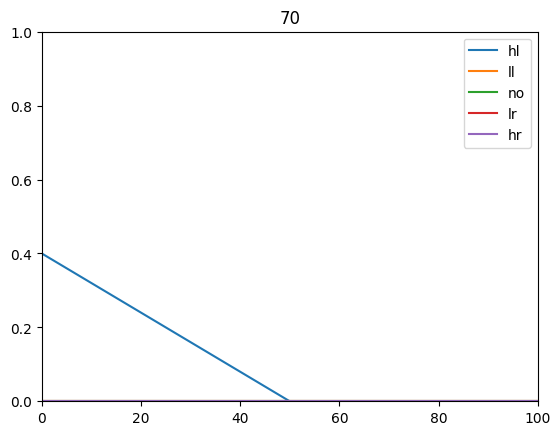

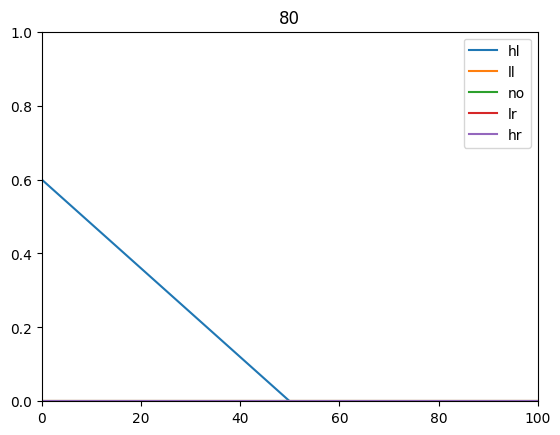

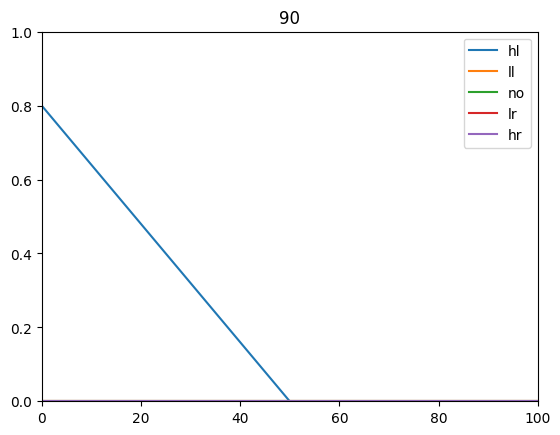

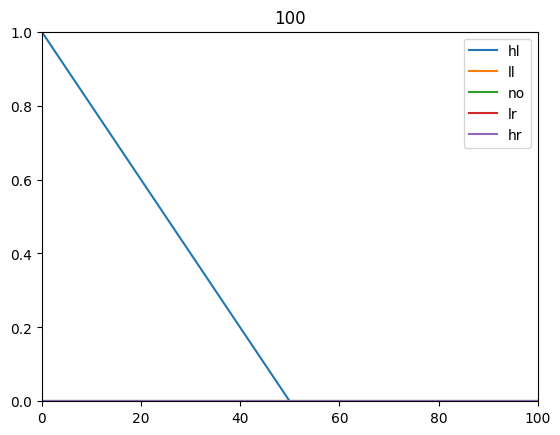

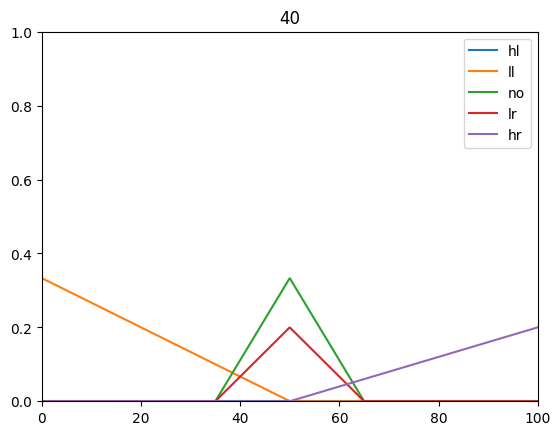

In [6]:
t = np.linspace(0,100,1000)

for i in range(0,110,10):
    ll = []
    lr = []
    hl = []
    hr = []
    no = []
    for j in t:
        w = fuzz.fuzzify(i,j)
        u = fuzz.inference(w)
        ll.append(u['ll'])
        lr.append(u['lr'])
        hl.append(u['hl'])
        hr.append(u['hr'])
        no.append(u['no'])
    plt.figure()
    plt.plot(t,hl)
    plt.plot(t,ll)
    plt.plot(t,no)
    plt.plot(t,lr)
    plt.plot(t,hr)
    plt.legend(['hl','ll','no','lr','hr'])
    plt.title(f"{i}")
    plt.ylim(0,1)
    plt.xlim(0,100)
t = np.linspace(0,100,1000)

# for i in range(0,110,10):
ll = []
lr = []
hl = []
hr = []
no = []
for j in t:
    w = fuzz.fuzzify(40,j)
    u = fuzz.inference(w)
    ll.append(u['ll'])
    lr.append(u['lr'])
    hl.append(u['hl'])
    hr.append(u['hr'])
    no.append(u['no'])
plt.figure()
plt.plot(t,hl)
plt.plot(t,ll)
plt.plot(t,no)
plt.plot(t,lr)
plt.plot(t,hr)
plt.legend(['hl','ll','no','lr','hr'])
plt.title(f"{40}")
plt.ylim(0,1)
plt.xlim(0,100)

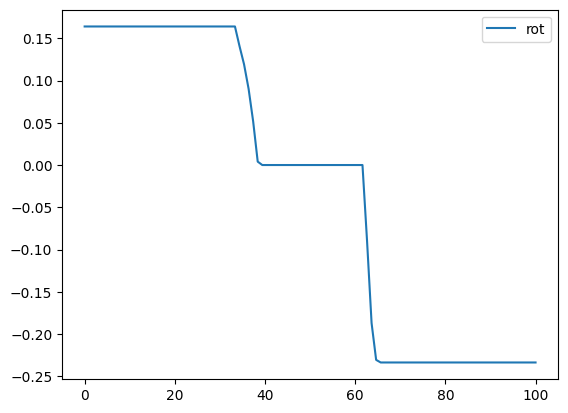

In [7]:
# t = np.linspace(0,100,100)

# for i in range(0,110,10):
#     rot = []
#     for j in t:
#         u = fuzz.decide(i,j)
#         rot.append(u)
#     plt.figure()
#     plt.plot(t,rot)
#     plt.legend(['rot'])
t = np.linspace(0,100,100)

# for i in range(0,110,10):
rot = []
for j in t:
    u = fuzz.decide(40,j)
    rot.append(u)
plt.figure()
plt.plot(t,rot)
plt.legend(['rot'])

(0.0, 100.0)

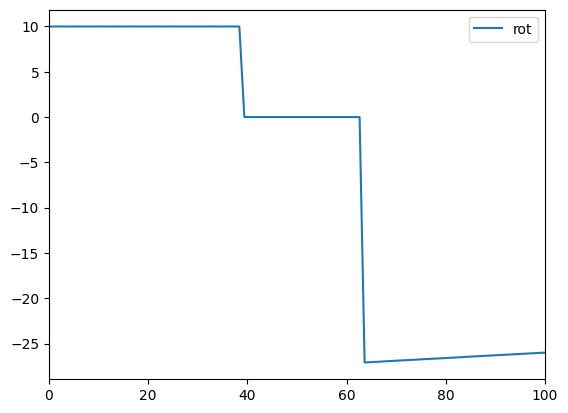

In [8]:
# t = np.linspace(0,100,100)

# for i in range(0,110,10):
#     rot = []
#     for j in t:
#         u = fuzz.decide(i,j,deffuzify_type="mean_max")
#         rot.append(u)
#     plt.figure()
#     plt.plot(t,rot)
#     plt.legend(['rot'])
t = np.linspace(0,100,100)

# for i in range(0,110,10):
rot = []
for j in t:
    u = fuzz.decide(40,j,deffuzify_type="mean_max",inference_type="Mamdani")
    rot.append(u)
plt.figure()
plt.plot(t,rot)
plt.legend(['rot'])
plt.xlim(0,100)

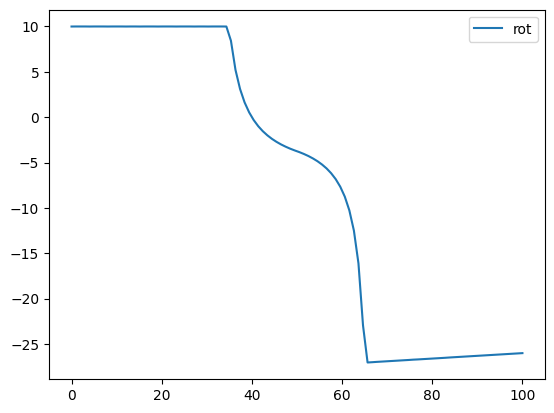

In [9]:
t = np.linspace(0,100,100)

# for i in range(0,110,10):
rot = []
for j in t:
    u = fuzz.decide(40,j,deffuzify_type="average",inference_type="Mamdani")
    rot.append(u)
plt.figure()
plt.plot(t,rot)
plt.legend(['rot'])
